<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Read-a-circuit" data-toc-modified-id="Read-a-circuit-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Read a circuit</a></span><ul class="toc-item"><li><span><a href="#Draw-the-coupling-map" data-toc-modified-id="Draw-the-coupling-map-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Draw the coupling map</a></span></li></ul></li><li><span><a href="#Generate-tensorNet" data-toc-modified-id="Generate-tensorNet-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Generate tensorNet</a></span><ul class="toc-item"><li><span><a href="#Draw-line-graph" data-toc-modified-id="Draw-line-graph-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>Draw line graph</a></span></li></ul></li><li><span><a href="#Optimize-the-ordering" data-toc-modified-id="Optimize-the-ordering-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Optimize the ordering</a></span><ul class="toc-item"><li><span><a href="#Analyze-different-circuits" data-toc-modified-id="Analyze-different-circuits-0.3.1"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>Analyze different circuits</a></span></li></ul></li></ul></li><li><span><a href="#Bristlecone" data-toc-modified-id="Bristlecone-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bristlecone</a></span><ul class="toc-item"><li><span><a href="#Plot-time-estimations" data-toc-modified-id="Plot-time-estimations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plot time estimations</a></span></li><li><span><a href="#Plot-treewidth" data-toc-modified-id="Plot-treewidth-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot treewidth</a></span></li><li><span><a href="#Time-for-batches-of-amplitudes" data-toc-modified-id="Time-for-batches-of-amplitudes-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Time for batches of amplitudes</a></span></li></ul></li><li><span><a href="#Sycamore" data-toc-modified-id="Sycamore-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sycamore</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Coupling-map" data-toc-modified-id="Coupling-map-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Coupling map</a></span></li><li><span><a href="#look-at-gates-on-single-qubit" data-toc-modified-id="look-at-gates-on-single-qubit-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>look at gates on single qubit</a></span></li></ul></li><li><span><a href="#Draw-sublattice-circuit-line-graph" data-toc-modified-id="Draw-sublattice-circuit-line-graph-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Draw sublattice circuit line graph</a></span></li><li><span><a href="#Strip-off-degree-2-nodes" data-toc-modified-id="Strip-off-degree-2-nodes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Strip-off degree-2 nodes</a></span></li><li><span><a href="#Analyse-full-cost" data-toc-modified-id="Analyse-full-cost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Analyse full cost</a></span></li><li><span><a href="#Delayed-parallelization" data-toc-modified-id="Delayed-parallelization-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Delayed parallelization</a></span></li><li><span><a href="#Late-parallelization" data-toc-modified-id="Late-parallelization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Late parallelization</a></span><ul class="toc-item"><li><span><a href="#Get-tree" data-toc-modified-id="Get-tree-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Get tree</a></span></li></ul></li><li><span><a href="#Secod-late-par" data-toc-modified-id="Secod-late-par-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Secod late par</a></span></li><li><span><a href="#Third-late-par" data-toc-modified-id="Third-late-par-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Third late par</a></span><ul class="toc-item"><li><span><a href="#Contract-several-nodes" data-toc-modified-id="Contract-several-nodes-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Contract several nodes</a></span></li><li><span><a href="#Recompute-peo" data-toc-modified-id="Recompute-peo-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>Recompute peo</a></span></li><li><span><a href="#find-slice-variables-with-tree-trimming" data-toc-modified-id="find-slice-variables-with-tree-trimming-2.7.3"><span class="toc-item-num">2.7.3&nbsp;&nbsp;</span>find slice variables with tree trimming</a></span></li><li><span><a href="#Remove-par-variable-and--get-peo-from-parallel-tree" data-toc-modified-id="Remove-par-variable-and--get-peo-from-parallel-tree-2.7.4"><span class="toc-item-num">2.7.4&nbsp;&nbsp;</span>Remove par variable and  get peo from parallel tree</a></span></li></ul></li></ul></li></ul></div>

In [199]:
import qtree
import qtensor
import qtensor.optimisation as qopt
import numpy as np
import networkx as nx
import networkx.algorithms.approximation as nx_approx
import matplotlib.pyplot as plt
import glob

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ls

'Analyse QAOA cost.ipynb'         'Node parallelism.ipynb'
'Analyse QAOA cost.py'             QAOA_Hands-on_tutorial.ipynb
'Draw circ.ipynb'                 'Simulate QAOA.ipynb'
 ExaTN.ipynb                       SupremacyTrimming.ipynb
'Graph parallelism.ipynb'          Tensor_Network_Tutorial.ipynb
'Lightcone optimisation.ipynb'     plots/
'Node contraction on tree.ipynb'


In [3]:
files = glob.glob('../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/*/*_0.txt')
files

['../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_11/bris_11_36_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_11/bris_11_24_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_11/bris_11_32_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_11/bris_11_40_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_11/bris_11_28_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_24_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_28_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_32_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_36_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_40_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_36_0.txt',
 '../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_28_0.txt',
 '../../qtree/

## Read a circuit

In [4]:
file = files[7]
file

'../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_32_0.txt'

In [5]:
n_qubits, qc = qtree.operators.read_circuit_file(file)
print(f'Qubits: {n_qubits}, gates: {len(sum(qc, []))}')


2020-07-19 18:09:17,733- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_32_0.txt
2020-07-19 18:09:17,735- INFO•	There are 48 qubits in circuit


Qubits: 48, gates: 1021


In [6]:
tn = qtensor.optimisation.TensorNet.QtreeTensorNet.from_qtree_gates(sum(qc,[]))

### Draw the coupling map

In [7]:
indices = set(g._qubits for g in sum(qc, []))
indices
devmap = nx.Graph()
for i in indices:
    if len(i)==1:
        devmap.add_node(i[0])
    elif len(i)==2:
        devmap.add_edge(*i)


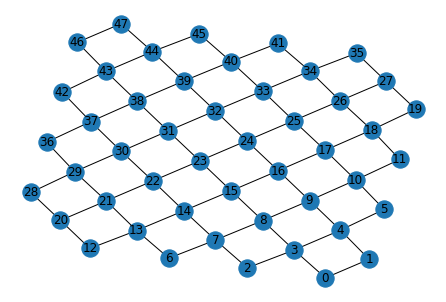

In [8]:
nx.draw_kamada_kawai(devmap, with_labels=True)

## Generate tensorNet

In [10]:
tn = qtensor.optimisation.TensorNet.QtreeTensorNet.from_qtree_gates(sum(qc,[]))

In [11]:
line_graph = tn.get_line_graph()

2020-07-17 18:08:24.998 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 500, edges: 1117


### Draw line graph

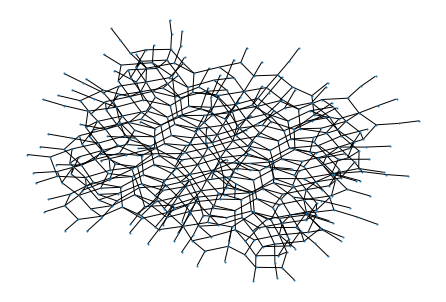

In [12]:

nx.draw_kamada_kawai(line_graph, node_size=1)

## Optimize the ordering

In [87]:
opt = qopt.Optimizer.TamakiTrimSlicing()
opt.max_tw = 32

In [89]:
def approx_time(opt):
    return 2**opt.treewidth/1e8 * 2**len(opt.parallel_vars)

In [91]:
peo, par_vars, tn = opt.optimize(tn)

print(f'Approximate simulation time: {approx_time(opt)}s, Treewith: {opt.treewidth}, Paths: {2**len(par_vars)}')

2020-07-15 01:24:23.418 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:45 - Line graph nodes: 500, edges: 1117
2020-07-15 01:24:28.699 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 32
2020-07-15 01:24:28.700 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 29
2020-07-15 01:24:28.700 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 30


Approximate simulation time: 5.36870912s, Treewith: 29, Paths: 1


In [99]:
def estimate_circuit_time(qc):
    tn = qopt.TensorNet.QtreeTensorNet.from_qtree_gates(sum(qc,[]))
    opt = qopt.Optimizer.TamakiTrimSlicing()
    opt.max_tw = 32
    return approx_time(opt)
    

### Analyze different circuits

file format:../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_32_0.txt',


In [164]:
def get_bris_file(s, d, i=0):
    return f'../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_{s}/bris_{s}_{d}_{i}.txt'

get_bris_file(9, 32)

'../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_32_0.txt'

In [167]:
sizes = [9, 10]
depths = range(28,41,4)
opt = qopt.Optimizer.TamakiTrimSlicing()
opt.max_tw = 34
opt.wait_time = 10


times = []
props = []
for s in sizes:
    for d in depths:
        filename = get_bris_file(s, d)
        n_qubits, qc = qtree.operators.read_circuit_file(filename)
        tn = qopt.TensorNet.QtreeTensorNet.from_qtree_gates(sum(qc,[]))
        peo, par_vars, tn = opt.optimize(tn)
        props.append([opt.treewidth, len(par_vars), peo, par_vars, tn])
        time = approx_time(opt)
        times.append(time)
        


2020-07-15 03:10:40,439- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_28_0.txt
2020-07-15 03:10:40,445- INFO•	There are 48 qubits in circuit
2020-07-15 03:10:40.504 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 454, edges: 1002
2020-07-15 03:10:50.932 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 03:10:50.933 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 21
2020-07-15 03:10:50.934 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 03:10:50,938- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_32_0.txt
2020-07-15 03:10:50,939- INFO•	There are 48 qubits in circuit
2020-07-15 03:10:51.066 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 500, edges: 1117
2020-07-15 03:11:01.507 | INFO     | qtensor.optimisation.Optimizer:optimiz

remove 152


2020-07-15 03:11:33.986 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 36
2020-07-15 03:11:34.292 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 496


2020-07-15 03:11:44.607 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 32
2020-07-15 03:11:44,616- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_28_0.txt
2020-07-15 03:11:44,620- INFO•	There are 60 qubits in circuit
2020-07-15 03:11:44.723 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 549, edges: 1234
2020-07-15 03:11:55.037 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 03:11:55.038 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 25
2020-07-15 03:11:55.039 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 03:11:55,043- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_32_0.txt
2020-07-15 03:11:55,047- INFO•	There are 60 qubits in circuit
2020-07-15 03:11:55.168 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line 

remove 187


2020-07-15 03:12:27.050 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 03:12:27.403 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 238


2020-07-15 03:12:37.735 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 34
2020-07-15 03:12:38.392 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 3. Amps count: 8


remove 568


2020-07-15 03:12:48.770 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 33
2020-07-15 03:12:49.502 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 4. Amps count: 16


remove 386


2020-07-15 03:12:59.845 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 31
2020-07-15 03:12:59,853- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_40_0.txt
2020-07-15 03:12:59,857- INFO•	There are 60 qubits in circuit
2020-07-15 03:12:59.994 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 714, edges: 1660
2020-07-15 03:13:10.367 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 03:13:10.368 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 41
2020-07-15 03:13:10.368 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 03:13:11.168 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 183
remove 513


2020-07-15 03:13:21.526 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 38
2020-07-15 03:13:21.990 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 4. Amps count: 16


remove 623
remove 403


2020-07-15 03:13:32.334 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 36
2020-07-15 03:13:32.736 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 5. Amps count: 32


remove 331


2020-07-15 03:13:43.096 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 03:13:43.770 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 6. Amps count: 64


remove 251


2020-07-15 03:13:54.117 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 33
2020-07-15 03:13:54.480 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 7. Amps count: 128


remove 652


2020-07-15 03:14:04.828 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 30


In [61]:
tn = qtensor.optimisation.TensorNet.QtreeTensorNet.from_qtree_gates(sum(qc,[]))

# Bristlecone

## Plot time estimations

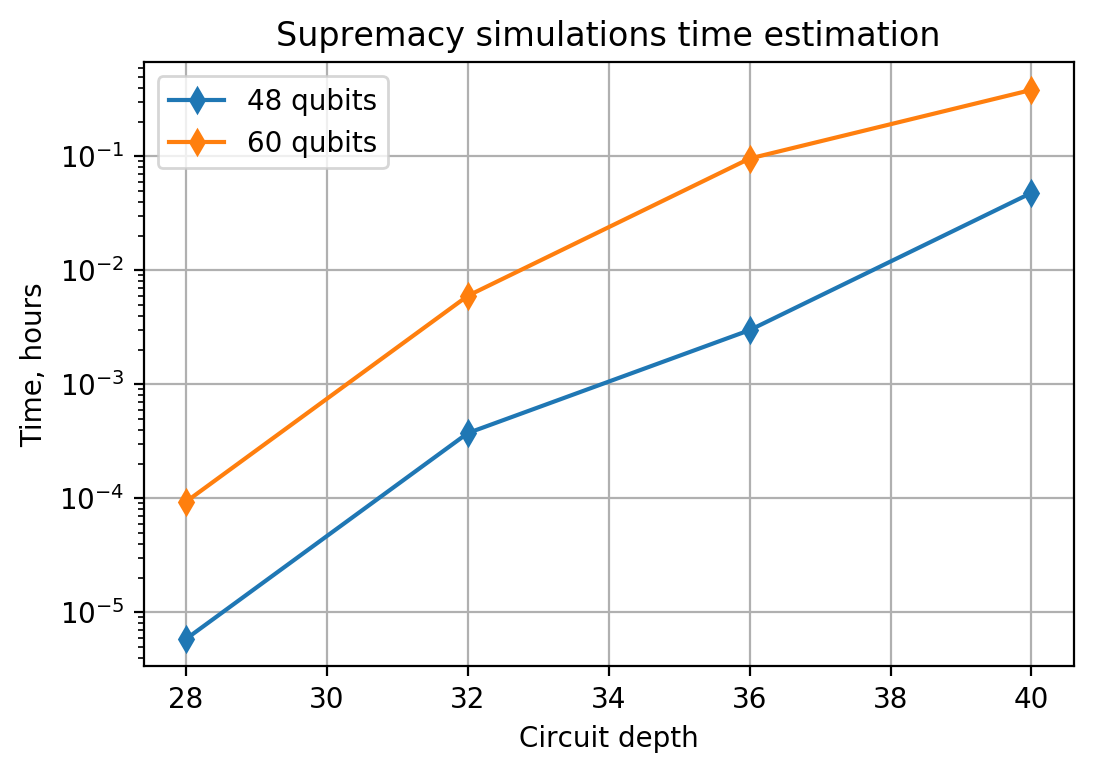

In [168]:
data = np.array(times).reshape(len(sizes), -1)
qubits = [48, 60]
plt.figure(dpi=200)
for q, row in zip(qubits, data):
    plt.plot(depths, row/60/60, 'd-', label=f'{q} qubits')
    
plt.title('Supremacy simulations time estimation')
plt.ylabel('Time, hours')
plt.xlabel('Circuit depth')
plt.legend()
plt.yscale('log')
plt.grid()


## Plot treewidth

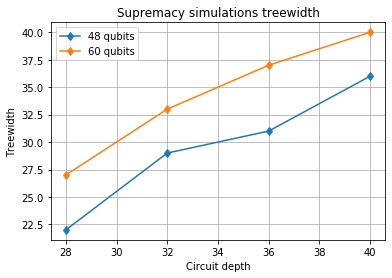

In [143]:
data = np.array(props).reshape(len(sizes), -1, 5)
qubits = [48, 60]
for q, row in zip(qubits, data):
    tw, pwl, *other = row.T
    plt.plot(depths, tw + pwl, 'd-', label=f'{q} qubits')
    
plt.title('Supremacy simulations treewidth')
plt.ylabel('Treewidth')
plt.xlabel('Circuit depth')
plt.legend()
plt.grid()


## Time for batches of amplitudes

In [136]:
filename = get_bris_file(10, 36)
n_qubits, qc = qtree.operators.read_circuit_file(filename)
tn = qopt.TensorNet.QtreeTensorNet.from_qtree_gates(sum(qc,[]))
tn.set_free_qubits([1,2,3])
peo, par_vars, tn = opt.optimize(tn)

2020-07-15 02:04:01,591- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_36_0.txt
2020-07-15 02:04:01,593- INFO•	There are 60 qubits in circuit
2020-07-15 02:04:01.706 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 662, edges: 1518
2020-07-15 02:04:07.119 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:04:07.120 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 39
2020-07-15 02:04:07.120 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:04:07.790 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 245
remove 575


2020-07-15 02:04:13.051 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 37
2020-07-15 02:04:13.432 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 4. Amps count: 16


remove 187
remove 238


2020-07-15 02:04:18.810 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:04:19.143 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 5. Amps count: 32


remove 568


2020-07-15 02:04:24.514 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 33
2020-07-15 02:04:25.206 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 6. Amps count: 64


remove 386


2020-07-15 02:04:30.527 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 32


In [158]:
batch_sizes = [0,5,10,15,20]
sizes = [9, 10]

opt = qopt.Optimizer.TamakiTrimSlicing()
opt.max_tw = 34
opt.wait_time = 15


props = []
times = []
for s in sizes:
    for b in batch_sizes:
        filename = get_bris_file(s, 40)
        n_qubits, qc = qtree.operators.read_circuit_file(filename)
        
        tn = qopt.TensorNet.QtreeTensorNet.from_qtree_gates(sum(qc,[]))
        tn.set_free_qubits(range(b))
        try:
            peo, par_vars, tn = opt.optimize(tn)
        except Exception as e:
            print(e)

        props.append([peo, par_vars, tn])
        props.append([opt.treewidth, len(par_vars), peo, par_vars, tn])
        time = approx_time(opt)
        times.append(time)


2020-07-15 02:39:16,069- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_40_0.txt
2020-07-15 02:39:16,071- INFO•	There are 48 qubits in circuit
2020-07-15 02:39:16.210 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 592, edges: 1348
2020-07-15 02:39:31.882 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:39:31.883 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 33
2020-07-15 02:39:31.884 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:39:32.377 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 1. Amps count: 2


remove 152


2020-07-15 02:39:47.692 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 33
2020-07-15 02:39:47.992 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 496


2020-07-15 02:40:03.297 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 31
2020-07-15 02:40:03,309- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_40_0.txt
2020-07-15 02:40:03,310- INFO•	There are 48 qubits in circuit
2020-07-15 02:40:03.433 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 597, edges: 1348
2020-07-15 02:40:19.258 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:40:19.259 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 35
2020-07-15 02:40:19.260 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:40:19.730 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 1. Amps count: 2


remove 158


2020-07-15 02:40:35.062 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:40:35.529 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 411


2020-07-15 02:40:50.862 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 33
2020-07-15 02:40:51.242 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 3. Amps count: 8


remove 496


2020-07-15 02:41:06.905 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 31
2020-07-15 02:41:07,088- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_40_0.txt
2020-07-15 02:41:07,089- INFO•	There are 48 qubits in circuit
2020-07-15 02:41:07.217 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 602, edges: 1348
2020-07-15 02:41:22.782 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:41:22.783 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 33
2020-07-15 02:41:22.784 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:41:23.194 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 1. Amps count: 2


remove 152


2020-07-15 02:41:39.191 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 34
2020-07-15 02:41:40.574 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 244


2020-07-15 02:41:56.070 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 32
2020-07-15 02:41:56,276- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_40_0.txt
2020-07-15 02:41:56,278- INFO•	There are 48 qubits in circuit
2020-07-15 02:41:56.387 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 607, edges: 1348
2020-07-15 02:42:12.066 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:42:12.068 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 38
2020-07-15 02:42:12.068 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:42:12.934 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 152
remove 159


2020-07-15 02:42:28.314 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:42:29.299 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 3. Amps count: 8


remove 11


2020-07-15 02:42:44.785 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:42:45.707 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 4. Amps count: 16


remove 244


2020-07-15 02:43:01.193 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 33
2020-07-15 02:43:01.560 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 5. Amps count: 32


remove 324


2020-07-15 02:43:17.042 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 31
2020-07-15 02:43:17,301- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_9/bris_9_40_0.txt
2020-07-15 02:43:17,302- INFO•	There are 48 qubits in circuit


Algorithmic error. Investigate


2020-07-15 02:43:17.500 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 612, edges: 1348
2020-07-15 02:43:33.467 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:43:33.469 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 38
2020-07-15 02:43:33.469 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:43:34.600 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 19
remove 184


2020-07-15 02:43:49.987 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 36
2020-07-15 02:43:50.482 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 3. Amps count: 8


remove 520


2020-07-15 02:44:05.955 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:44:07.169 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 4. Amps count: 16


remove 161


2020-07-15 02:44:22.566 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:44:22.936 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 5. Amps count: 32


remove 185


2020-07-15 02:44:38.319 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 32
2020-07-15 02:44:38,548- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_40_0.txt
2020-07-15 02:44:38,553- INFO•	There are 60 qubits in circuit
2020-07-15 02:44:38.696 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 714, edges: 1660


Algorithmic error. Investigate


2020-07-15 02:44:54.133 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:44:54.134 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 40
2020-07-15 02:44:54.134 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:44:54.986 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 183
remove 623


2020-07-15 02:45:10.506 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 37
2020-07-15 02:45:11.454 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 4. Amps count: 16


remove 513
remove 403


2020-07-15 02:45:26.969 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 36
2020-07-15 02:45:27.385 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 5. Amps count: 32


remove 331


2020-07-15 02:45:43.264 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:45:43.972 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 6. Amps count: 64


remove 251


2020-07-15 02:45:59.706 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 33
2020-07-15 02:46:00.769 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 7. Amps count: 128


remove 652


2020-07-15 02:46:16.785 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 32
2020-07-15 02:46:16,811- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_40_0.txt
2020-07-15 02:46:16,821- INFO•	There are 60 qubits in circuit
2020-07-15 02:46:17.452 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 719, edges: 1660
2020-07-15 02:46:35.431 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:46:35.438 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 42
2020-07-15 02:46:35.439 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:46:37.005 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 3. Amps count: 8


remove 182
remove 183
remove 513


2020-07-15 02:46:53.001 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 37
2020-07-15 02:46:53.630 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 5. Amps count: 32


remove 623
remove 331


2020-07-15 02:47:09.304 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:47:10.505 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 6. Amps count: 64


remove 630


2020-07-15 02:47:26.258 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 34
2020-07-15 02:47:27.566 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 7. Amps count: 128


remove 380


2020-07-15 02:47:43.706 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 33
2020-07-15 02:47:44.860 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 8. Amps count: 256


remove 403


2020-07-15 02:48:00.443 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 32
2020-07-15 02:48:00,696- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_40_0.txt
2020-07-15 02:48:00,702- INFO•	There are 60 qubits in circuit
2020-07-15 02:48:00.887 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 724, edges: 1660
2020-07-15 02:48:16.620 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:48:16.621 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 40
2020-07-15 02:48:16.622 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:48:17.212 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 183
remove 441


2020-07-15 02:48:32.598 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 39
2020-07-15 02:48:33.984 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 4. Amps count: 16


remove 242
remove 293


2020-07-15 02:48:49.444 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:48:50.145 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 5. Amps count: 32


remove 623


2020-07-15 02:49:05.545 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:49:07.219 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 6. Amps count: 64


remove 361


2020-07-15 02:49:22.600 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 33
2020-07-15 02:49:23.306 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 7. Amps count: 128


remove 513


2020-07-15 02:49:38.691 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 31
2020-07-15 02:49:38,929- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_40_0.txt
2020-07-15 02:49:38,929- INFO•	There are 60 qubits in circuit
2020-07-15 02:49:39.077 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 729, edges: 1660
2020-07-15 02:49:54.996 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:49:54.997 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 40
2020-07-15 02:49:54.998 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:49:55.576 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 2. Amps count: 4


remove 623
remove 513


2020-07-15 02:50:11.069 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 38
2020-07-15 02:50:11.927 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 4. Amps count: 16


remove 183
remove 652


2020-07-15 02:50:27.321 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 37
2020-07-15 02:50:28.166 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 6. Amps count: 64


remove 403
remove 331


2020-07-15 02:50:43.525 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:50:43.975 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 7. Amps count: 128


remove 542


2020-07-15 02:50:59.336 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 32
2020-07-15 02:50:59,553- INFO•	reading file ../../qtree/test_circuits/GRCS/inst/bristlecone/cz_v2/bris_10/bris_10_40_0.txt
2020-07-15 02:50:59,554- INFO•	There are 60 qubits in circuit
2020-07-15 02:50:59.977 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 734, edges: 1660
2020-07-15 02:51:15.676 | INFO     | qtensor.optimisation.Optimizer:optimize:89 - Maximum treewidth: 34
2020-07-15 02:51:15.677 | INFO     | qtensor.optimisation.Optimizer:_split_graph:125 - Treewidth: 43
2020-07-15 02:51:15.678 | INFO     | qtensor.optimisation.Optimizer:_split_graph:126 - Target treewidth: 32
2020-07-15 02:51:16.330 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 3. Amps count: 8


remove 183
remove 623
remove 513


2020-07-15 02:51:31.714 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 39
2020-07-15 02:51:32.614 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 5. Amps count: 32


remove 530
remove 403


2020-07-15 02:51:48.009 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 36
2020-07-15 02:51:48.526 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 6. Amps count: 64


remove 331


2020-07-15 02:52:03.891 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 35
2020-07-15 02:52:04.314 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 7. Amps count: 128


remove 251


2020-07-15 02:52:20.028 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 34
2020-07-15 02:52:20.597 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 8. Amps count: 256


remove 202


2020-07-15 02:52:35.969 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 33
2020-07-15 02:52:36.391 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:148 - Parvars count: 9. Amps count: 512


remove 652


2020-07-15 02:52:51.748 | DEBUG    | qtensor.optimisation.Optimizer:_split_graph:152 - Treewidth: 31


In [149]:
2**32/1e8


42.94967296

In [13]:
times = np.array(times)
qubits = [48, 60]
#plt.figure(dpi=200)

data = np.array(times).reshape(len(sizes), -1)
for q, row in zip(qubits, data):
    plt.plot(2**np.array(batch_sizes), row/60/60, 'd-', label=f'{q} qubits')
    
plt.xscale('log', basex=10)
plt.legend()

plt.title('Time to simulate batches of amplitudes, depth=40')
plt.ylabel('Time,hours')
plt.xlabel('Amplitudes in batch')
plt.grid()

NameError: name 'times' is not defined

# Sycamore

In [9]:
def get_syc_file(s, d, i=0):
    return f'../../qtree/test_circuits/inst/sycamore/n{s}_m{d}/circuit_n{s}_m{d}_s0_e0_pABCDCDAB.qsim'

file = get_syc_file(53, 20)
file

'../../qtree/test_circuits/inst/sycamore/n53_m20/circuit_n53_m20_s0_e0_pABCDCDAB.qsim'

### Coupling map

2020-07-19 18:09:29,719- INFO•	reading file ../../qtree/test_circuits/inst/sycamore/n53_m20/circuit_n53_m20_s0_e0_pABCDCDAB.qsim
2020-07-19 18:09:29,734- INFO•	There are 53 qubits in circuit


Qubits: 53, gates: 3693


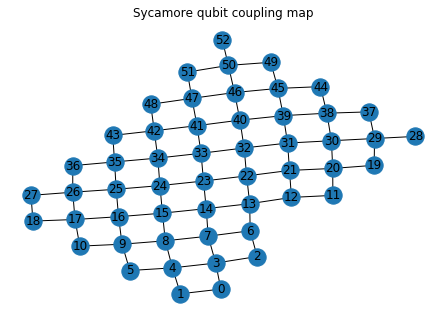

In [10]:
n_qubits, qc = qtree.operators.read_circuit_file(file)
print(f'Qubits: {n_qubits}, gates: {len(sum(qc, []))}')

tn = qtensor.optimisation.TensorNet.QtreeTensorNet.from_qtree_gates(sum(qc,[]))

### Draw the coupling map

indices = set(g._qubits for g in sum(qc, []))
indices
devmap = nx.Graph()
for i in indices:
    if len(i)==1:
        devmap.add_node(i[0])
    elif len(i)==2:
        devmap.add_edge(*i)


nx.draw_kamada_kawai(devmap, with_labels=True)
plt.title('Sycamore qubit coupling map')
plt.show()


### look at gates on single qubit

In [11]:
qubit = 23
one_qubit_gates = [g for g in sum(qc, []) if qubit in g.qubits]
gate_names = [g.name for g in one_qubit_gates]

np.array(one_qubit_gates[1:]).reshape(-1, 5)
print('number of gates:',len(gate_names))
np.array(gate_names[1:]).reshape(-1, 5)

number of gates: 101


array([['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'Y_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'X_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'Y_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'W_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'Y_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'X_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'Y_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'W_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'Y_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'X_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'W_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'X_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'W_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'X_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'W_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'X_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'Y_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'X_1_2'],
       ['ZPhase', 'cZ', 'SWAP', 'ZPhase', 'Y_1_2'],
       ['ZPh

We can simplify zphase, just merge it with another 1-qubit gate

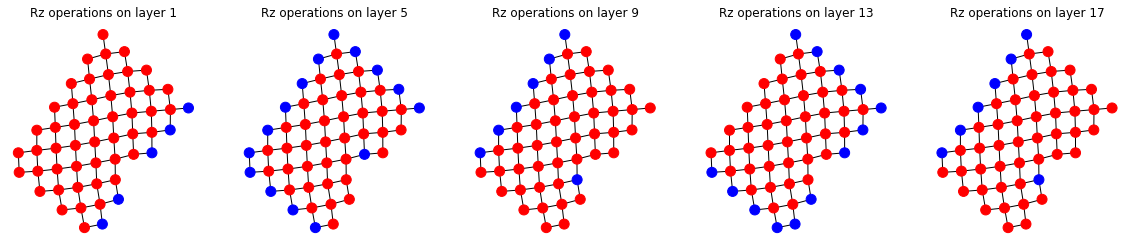

In [12]:
layers = [1, 5, 9, 13, 17]
f, axs = plt.subplots(1,len(layers), figsize=(4*len(layers), 4))
axs = iter(axs)
for l in layers:
    rzs = qc[l]
    rzqb = [rz.qubits[0] for rz in rzs]

    cols = ['red' if q in rzqb else 'blue' for q in devmap.nodes()]
    ax = next(axs)
    plt.sca(ax)
    nx.draw_kamada_kawai(devmap, node_color=cols, node_size=100)
    ax.set_title(f'Rz operations on layer {l}')
    
plt.show()

## Draw sublattice circuit line graph

In [13]:
def line_graph_sublattice(qc, subq):
    subgates = [g for g in sum(qc, []) if all([q in subq for q in g.qubits])]
    tn = qopt.TensorNet.QtreeTensorNet.from_qtree_gates(subgates)
    return tn.get_line_graph()

2020-07-19 18:09:53.133 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 220, edges: 605


Analysing line graph of subcircuit on [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


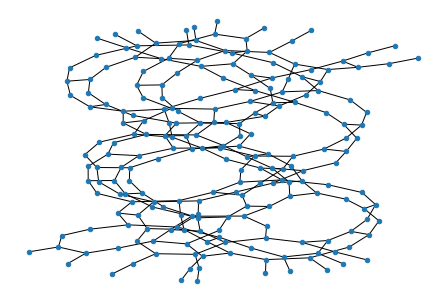

In [15]:
sublattice_qubits = list(range(10))
print(f'Analysing line graph of subcircuit on {sublattice_qubits}')

subline_graph = line_graph_sublattice(qc, sublattice_qubits)
nx.draw_kamada_kawai(subline_graph, node_size=20)

2020-07-19 18:09:53.815 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 220, edges: 295


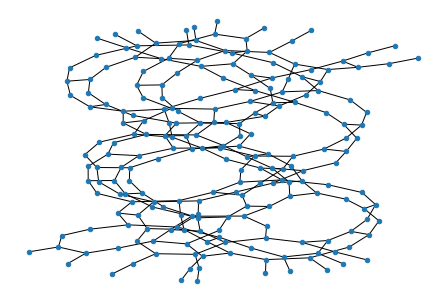

In [16]:
qc_no_rz = [g for g in sum(qc, []) if not isinstance(g, qtree.operators.ZPhase)]
subline_graph = line_graph_sublattice([qc_no_rz], sublattice_qubits)
nx.draw_kamada_kawai(subline_graph, node_size=20)
plt.show()

In [17]:
qtree.operators.ZPhase(1, alpha=1).gen_tensor()

array([ 1.+0.0000000e+00j, -1.+1.2246468e-16j])

RZ is a diagonal gate!

## Strip-off degree-2 nodes

Text(0.5, 1.0, 'Line graph with once contracted 2-degree edges')

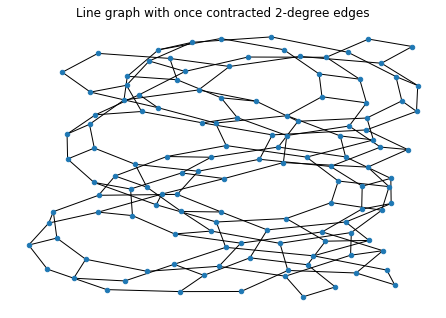

In [18]:
subline_graph_strip1 = qtensor.optimisation.Optimizer.strip_graph(subline_graph)
nx.draw_kamada_kawai(subline_graph_strip1, node_size=20)
plt.title('Line graph with once contracted 2-degree edges')

Text(0.5, 1.0, 'Line graph with twice contracted 2-degree edges')

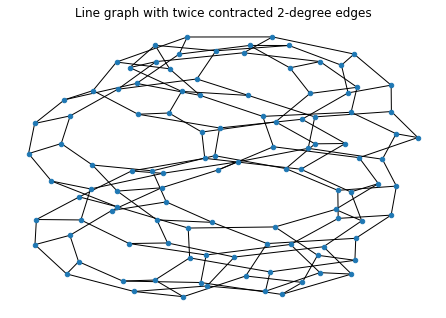

In [19]:
subline_graph_strip2 = qtensor.optimisation.Optimizer.strip_graph(subline_graph_strip1)
nx.draw_kamada_kawai(subline_graph_strip2, node_size=20)
plt.title('Line graph with twice contracted 2-degree edges')

In [20]:
peo, tw = qtree.graph_model.peo_calculation.get_upper_bound_peo_pace2017(subline_graph_strip2,wait_time=60*15)

In [33]:
tw

10

In [34]:
def plot_conraction_costs(graph, peo, plot_title=''):
    f, axs = plt.subplots(1, 2, figsize=(10, 4))
    plt.sca(axs[0])
    mems, flops = plot_costs_peo(graph, peo, print_stat=True)
    plt.sca(axs[1])
    _, path = qtensor.utils.get_neighbours_path(graph, peo)
    plt.title(plot_title)
    plt.plot(path)
    plt.grid()
    print(f'Max peo: {max(path)}')

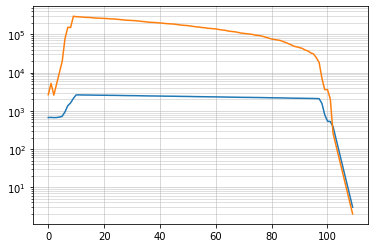

In [35]:
mems, flops = qtree.graph_model.get_contraction_costs(subline_graph_strip2)
qtensor.utils.plot_cost(mems,flops)

In [36]:
opt_subline_graph_strip2, _ = qtensor.utils.reorder_graph(subline_graph_strip2, peo)
mems, flops = qtree.graph_model.get_contraction_costs(opt_subline_graph_strip2)
qtensor.utils.plot_cost(mems,flops)

KeyError: 31

## Analyse full cost

In [44]:
def plot_costs_peo(graph, peo, print_stat=False):
    graph, _ = qtensor.utils.reorder_graph(graph, peo)
    mems, flops = qtree.graph_model.get_contraction_costs(graph)
    qtensor.utils.plot_cost(mems, flops)
    if print_stat:
        print(f'Total FLOP: {sum(flops):e}, maximum mem: {max(mems):e}')
    return mems, flops
        

In [37]:
tn = qopt.TensorNet.QtreeTensorNet.from_qtree_gates(sum(qc, []))
line_g = tn.get_line_graph()

2020-07-19 18:37:38.983 | INFO     | qtensor.optimisation.TensorNet:get_line_graph:49 - Line graph nodes: 1166, edges: 3369


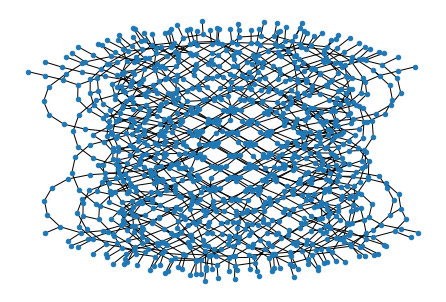

In [221]:
nx.draw_kamada_kawai(line_g, node_size=20)

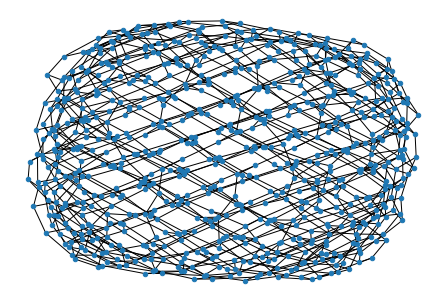

In [222]:
line_g_strip1 = qopt.Optimizer.strip_graph(line_g)
line_g_strip2 = qopt.Optimizer.strip_graph(line_g_strip1)
nx.draw_kamada_kawai(line_g_strip2, node_size=20)

In [267]:
# precomputed
peo = [397, 441, 494, 440, 291, 238, 247, 176, 413, 344, 519, 406, 281, 203, 307, 202, 256, 258, 204, 300, 353, 338, 295, 180, 178, 224, 232, 231, 179, 417, 470, 574, 682, 521, 576, 575, 522, 348, 410, 285, 187, 242, 189, 190, 364, 311, 304, 240, 309, 362, 302, 188, 685, 422, 473, 526, 472, 632, 579, 524, 578, 630, 525, 633, 409, 264, 316, 314, 356, 363, 250, 740, 528, 634, 635, 420, 367, 370, 529, 310, 416, 208, 312, 207, 195, 197, 248, 196, 418, 308, 261, 527, 419, 366, 469, 251, 313, 368, 260, 262, 468, 346, 408, 293, 222, 283, 547, 625, 173, 515, 517, 549, 507, 556, 429, 674, 738, 505, 560, 559, 837, 447, 1003, 1104, 759, 590, 588, 708, 641, 761, 700, 723, 829, 874, 500, 553, 501, 623, 721, 668, 677, 426, 371, 1098, 1077, 1081, 941, 774, 994, 942, 1047, 1048, 888, 939, 992, 940, 993, 887, 729, 657, 835, 720, 816, 1088, 1035, 929, 1037, 984, 983, 1036, 650, 604, 703, 809, 862, 803, 658, 710, 763, 643, 702, 615, 833, 982, 1086, 937, 990, 886, 938, 884, 1041, 935, 936, 980, 876, 928, 537, 831, 805, 717, 535, 482, 484, 431, 430, 839, 943, 944, 997, 894, 945, 946, 1000, 999, 648, 646, 491, 540, 320, 377, 436, 487, 488, 1054, 950, 1056, 1057, 1058, 948, 842, 778, 725, 653, 600, 897, 791, 780, 664, 726, 551, 509, 498, 394, 341, 235, 288, 245, 821, 731, 768, 777, 609, 617, 715, 662, 671, 557, 558, 611, 565, 566, 619, 568, 513, 621, 567, 570, 460, 391, 405, 299, 185, 627, 381, 443, 399, 496, 442, 272, 271, 161, 214, 268, 229, 354, 301, 292, 337, 166, 219, 164, 217, 165, 171, 169, 931, 986, 933, 1039, 1040, 985, 871, 597, 712, 818, 659, 765, 775, 704, 810, 934, 606, 977, 922, 924, 1031, 976, 925, 1074, 915, 1021, 1022, 1093, 880, 756, 827, 817, 870, 867, 918, 971, 919, 1024, 865, 970, 1090, 1045, 968, 916, 1019, 1072, 1099, 814, 913, 801, 807, 860, 859, 858, 812, 911, 857, 966, 1017, 1070, 1018, 964, 963, 912, 965, 747, 479, 378, 532, 480, 694, 690, 749, 585, 696, 692, 955, 956, 1009, 903, 800, 849, 802, 904, 689, 795, 691, 850, 1067, 908, 1014, 1015, 1012, 1062, 1066, 1065, 961, 1013, 853, 906, 959, 855, 907, 958, 960, 1010, 798, 796, 754, 825, 878, 815, 701, 748, 638, 695, 797, 586, 854, 1073, 1071, 744, 975, 1026, 1079, 1027, 1028, 869, 973, 920, 921, 974, 972, 1078, 806, 923, 1082, 967, 868, 1080, 1020, 932, 1089, 1038, 914, 909, 861, 808, 879, 773, 755, 1101, 826, 1091, 1029, 841, 1025, 1046, 531, 667, 783, 764, 711, 605, 607, 373, 669, 877, 1097, 930, 1087, 1034, 1043, 991, 989, 1095, 1033, 981, 1042, 927, 979, 873, 820, 824, 753, 642, 697, 589, 866, 875, 823, 852, 813, 752, 799, 760, 699, 693, 536, 591, 483, 822, 1044, 1105, 1103, 1050, 885, 770, 832, 1049, 1051, 892, 998, 834, 779, 762, 804, 772, 719, 706, 709, 707, 649, 647, 596, 594, 595, 593, 544, 542, 543, 598, 489, 698, 541, 490, 539, 437, 433, 438, 434, 1052, 1096, 1108, 1055, 1110, 1112, 1059, 1002, 891, 838, 785, 769, 732, 736, 672, 716, 654, 893, 949, 896, 952, 844, 951, 843, 781, 771, 953, 788, 840, 735, 727, 728, 718, 666, 786, 655, 656, 614, 602, 562, 603, 616, 552, 499, 492, 510, 386, 351, 883, 864, 830, 663, 724, 811, 610, 665, 613, 612, 618, 673, 787, 734, 620, 675, 622, 534, 714, 561, 601, 324, 624, 569, 503, 516, 514, 508, 506, 504, 555, 461, 451, 446, 455, 444, 511, 485, 464, 462, 512, 450, 456, 452, 445, 407, 454, 401, 403, 392, 385, 518, 402, 393, 384, 340, 349, 331, 449, 379, 411, 350, 332, 339, 297, 244, 359, 286, 296, 279, 287, 253, 305, 396, 290, 233, 182, 226, 280, 846, 733, 679, 681, 705, 428, 267, 425, 435, 550, 497, 390, 388, 376, 398, 389, 382, 323, 374, 325, 329, 266, 372, 282, 335, 239, 345, 375, 347, 328, 303, 284, 275, 270, 218, 223, 225, 269, 276, 278, 273, 274, 336, 170, 495, 172, 177, 181, 186, 191, 355, 357, 361, 194, 520, 686, 199, 198, 688, 380, 230, 387, 234, 400, 383, 546, 548, 241, 243, 249, 414, 255, 257, 573, 415, 294, 277, 453, 459, 463, 467, 626, 631, 792, 790, 794, 330, 737, 680, 628, 684]


Total FLOP: 2.777840e+20, maximum mem: 9.042384e+15
Max peo: 52


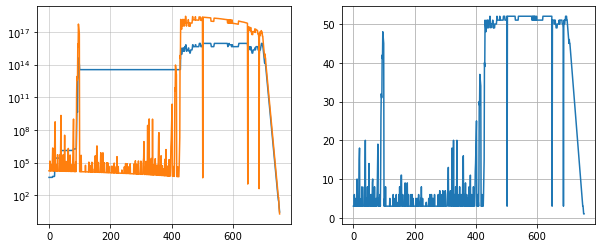

In [268]:
plot_conraction_costs(line_g_strip2, peo)


## Delayed parallelization 

In [269]:
def partial_contract(old_graph, peo, n_steps, with_plot=False):
    graph = old_graph.copy()
    print(f'Before contracting {n_steps} steps: Nodes, edges:', graph.number_of_nodes(), graph.number_of_edges())
    
    for n in list(peo)[:n_steps]:
        qtree.graph_model.eliminate_node(graph, n)

    if with_plot:
        print(f'After contracting {n_steps} steps:  Nodes, edges:', graph.number_of_nodes(), graph.number_of_edges())
        nx.draw_kamada_kawai(graph, node_size=20)
    return graph
 

Before contracting 50 steps: Nodes, edges: 754 1131
After contracting 50 steps:  Nodes, edges: 704 1402


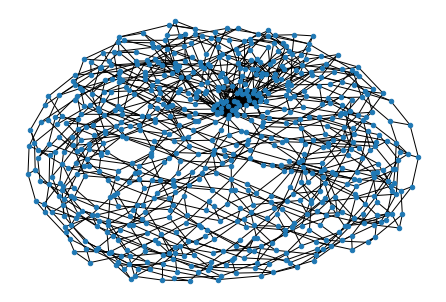

In [270]:
reduced_graph = partial_contract(line_g_strip2, peo, n_steps=50, with_plot=True)

In [ ]:
len(nx_approx.max_clique(reduced_graph))

In [ ]:
peo_d, tw_d = qtree.graph_model.peo_calculation.get_upper_bound_peo_pace2017(reduced_graph, wait_time=60*115)

In [378]:
print(tw_d)

54


In [227]:
def grid_iter(n, maxcols=3, figsize=None, **args):
    if n>maxcols:
        nrows = n//maxcols
    else:
        nrows = 1
    ncols = min(maxcols, n)
    if figsize is None:
        figsize=(ncols*6, nrows*4)
    f, axs = plt.subplots(nrows, ncols, figsize=figsize,
                          **args)
    if nrows>1:
        axs = axs.flatten()
    for ax in  axs:
        plt.sca(ax)
        yield f, ax

In [228]:
print(len(peo))
peo_d = peo[50:]
print(reduced_graph.number_of_nodes())

754
704


In [229]:
tree_d = qtree.graph_model.clique_trees.get_tree_from_peo(reduced_graph, peo_d)

In [233]:
cm = cmap.get_cmap('gnuplot2')
sizes = [len(n) for n in tree_d.nodes()]
colors = [cm(size/57) for size in sizes]


opt = qopt.Optimizer.TamakiTrimSlicing()
opt.cost_type = 'length'
par_vars = opt._get_par_vars(reduced_graph, peo_d, 18)

In [231]:
pos = nx.kamada_kawai_layout(tree_d)

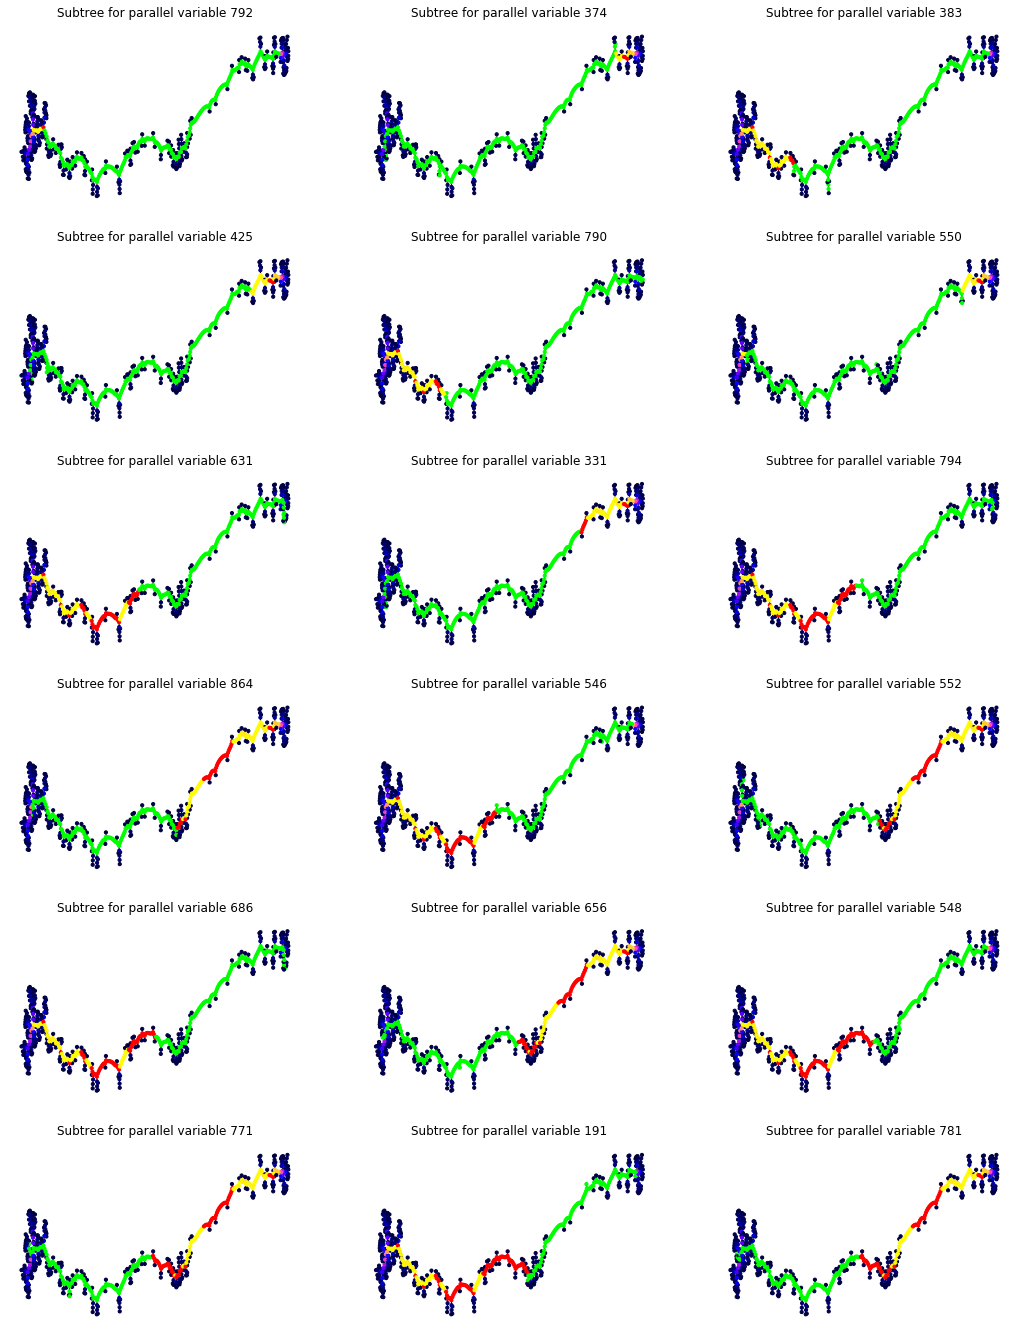

In [234]:
plt_grid = grid_iter(len(par_vars))

for pvar in par_vars:
    next(plt_grid)

    sizes = [len(n) for n in tree_d.nodes()]
    colors = [cm(size/57) for size in sizes]
    max_s = max(sizes)
    colors = [(1,0,0,1) if len(n)==max_s else c for c, n in zip(colors, tree_d.nodes())]
    colors = [(0,1,0,1) if (pvar in n) else c for c, n in zip(colors, tree_d.nodes())]
    nx.draw(tree_d, pos=pos, node_color=colors, node_size=10)
    plt.gca().set_title(f'Subtree for parallel variable {pvar}')

plt.show()

In [237]:
max_size = max([len(n) for n in tree_d.nodes()])
highest_nodes = [set(n) for n in tree_d.nodes() if len(n) == max_size]
best = set.intersection(*highest_nodes)
best


set()

In [247]:
peo_tree = qtree.graph_model.clique_trees.get_peo_from_tree(tree_d, clique_vertices=[467])


subp frozenset({685})
subp frozenset({422})
subp frozenset({473})
subp frozenset({526})
subp frozenset({472})
subp frozenset({632})
subp frozenset({579})
subp frozenset({524})
subp frozenset({578})
subp frozenset({630})
subp frozenset({525})
subp frozenset({633})
subp frozenset({409})
subp frozenset({264})
subp frozenset({316})
subp frozenset({314})
subp frozenset({356})
subp frozenset({363})
subp frozenset({250})
subp frozenset({740})
subp frozenset({528})
subp frozenset({634})
subp frozenset({635})
subp frozenset({420})
subp frozenset({367})
subp frozenset({370})
subp frozenset({529})
subp frozenset({310})
subp frozenset({416})
subp frozenset({208})
subp frozenset({312})
subp frozenset({207})
subp frozenset({195})
subp frozenset({197})
subp frozenset({248})
subp frozenset({196})
subp frozenset({468})
subp frozenset({346})
subp frozenset({408})
subp frozenset({293})
subp frozenset({222})
subp frozenset({283})
subp frozenset({547})
subp frozenset({625})
subp frozenset({173})
subp froze

In [248]:

tree_d = qtree.graph_model.clique_trees.get_tree_from_peo(reduced_graph, peo_tree)

Total FLOP: 2.976280e+20, maximum mem: 9.007199e+15
Max peo: 52


Text(0.5, 1.0, 'Cost for recreated peo from tree')

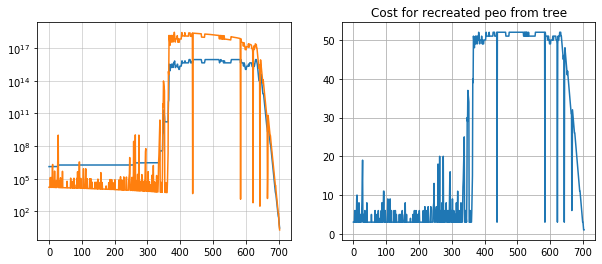

In [259]:
plot_conraction_costs(reduced_graph, peo_tree)
plt.title('Cost for recreated peo from tree')

In [178]:
pv = par_vars[0]
other_nodes = [ n for n in tree_d.nodes() if pv not in n ]
other_nodes_len = [len(n) for n in other_nodes]
print(other_nodes_len)
print('max', max(other_nodes_len))

[4, 4, 4, 7, 4, 10, 4, 4, 4, 7, 4, 5, 6, 4, 4, 6, 4, 9, 4, 4, 6, 12, 4, 4, 4, 7, 4, 4, 6, 4, 4, 9, 4, 4, 4, 4, 7, 13, 15, 19, 22, 26, 4, 4, 4, 7, 4, 5, 4, 11, 31, 38, 4, 4, 4, 7, 4, 4, 4, 4, 7, 12, 16, 41, 52, 51, 52, 52, 51, 52, 52, 53, 4, 4, 4, 4, 32, 33, 15, 7]
max 53


In [260]:
reduced_parallel_graph = reduced_graph.copy()
parallel_tree = tree_d.copy()
reduced_parallel_peo = list(peo_tree)


for pvar in list((par_vars))[:4]:
    print('Removing', pvar)
    qtree.graph_model.splitters.remove_node(reduced_parallel_graph, pvar)
    parallel_tree = qtree.graph_model.clique_trees.rm_element_in_tree(parallel_tree, pvar)
    print(max([len(n) for n in parallel_tree.nodes()]))
    reduced_parallel_peo.remove(pvar)

Removing 792
53
Removing 374
52
Removing 383
52
Removing 425
51


Total FLOP: 2.595384e+19, maximum mem: 2.251800e+15
Max peo: 50


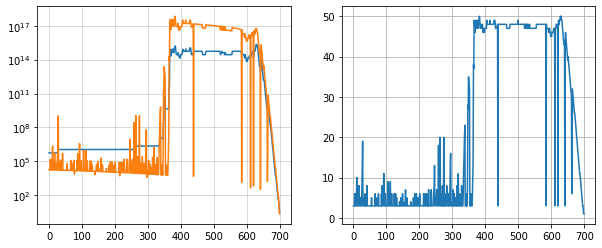

In [261]:
plot_conraction_costs(reduced_parallel_graph, reduced_parallel_peo)

In [263]:
#max_cl = nx_approx.max_clique(reduced_graph)
peo_from_parallel_tree = qtree.graph_model.clique_trees.get_peo_from_tree(parallel_tree)#, clique_vertices=max_cl)

subp frozenset({422})
subp frozenset({473})
subp frozenset({526})
subp frozenset({472})
subp frozenset({632})
subp frozenset({579})
subp frozenset({524})
subp frozenset({578})
subp frozenset({630})
subp frozenset({525})
subp frozenset({409})
subp frozenset({264})
subp frozenset({316})
subp frozenset({314})
subp frozenset({356})
subp frozenset({363})
subp frozenset({250})
subp frozenset({740})
subp frozenset({528})
subp frozenset({634})
subp frozenset({635})
subp frozenset({420})
subp frozenset({367})
subp frozenset({370})
subp frozenset({529})
subp frozenset({310})
subp frozenset({208})
subp frozenset({312})
subp frozenset({207})
subp frozenset({195})
subp frozenset({197})
subp frozenset({248})
subp frozenset({196})
subp frozenset({468})
subp frozenset({346})
subp frozenset({408})
subp frozenset({293})
subp frozenset({222})
subp frozenset({283})
subp frozenset({547})
subp frozenset({625})
subp frozenset({173})
subp frozenset({515})
subp frozenset({517})
subp frozenset({549})
subp froze

subp frozenset({769})
subp frozenset({732})
subp frozenset({736})
subp frozenset({672})
subp frozenset({716})
subp frozenset({654})
subp frozenset({893})
subp frozenset({949})
subp frozenset({896})
subp frozenset({952})
subp frozenset({844})
subp frozenset({951})
subp frozenset({843})
subp frozenset({781})
subp frozenset({771})
subp frozenset({953})
subp frozenset({788})
subp frozenset({840})
subp frozenset({735})
subp frozenset({727})
subp frozenset({728})
subp frozenset({718})
subp frozenset({666})
subp frozenset({786})
subp frozenset({655})
subp frozenset({656})
subp frozenset({614})
subp frozenset({602})
subp frozenset({562})
subp frozenset({603})
subp frozenset({616})
subp frozenset({552})
subp frozenset({499})
subp frozenset({492})
subp frozenset({510})
subp frozenset({386, 351})
subp frozenset({883})
subp frozenset({864, 830})
subp frozenset({663})
subp frozenset({811, 724})
subp frozenset({665, 610})
subp frozenset({612, 613})
subp frozenset({673, 618})
subp frozenset({787})
su

In [264]:
max([len(n) for n in parallel_tree.nodes()])

51

Total FLOP: 2.457031e+19, maximum mem: 2.251800e+15
Max peo: 50


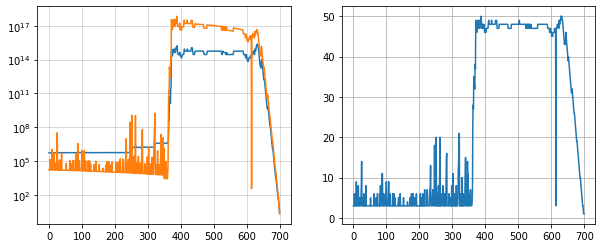

In [265]:
plot_conraction_costs(reduced_parallel_graph, peo_from_parallel_tree)

In [220]:
peo_dp, tw_dp = qtree.graph_model.peo_calculation.get_upper_bound_peo_pace2017(reduced_parallel_graph, wait_time=60*35)

subp frozenset({107})
subp frozenset({215})
subp frozenset({338})
subp frozenset({349})
subp frozenset({366})
subp frozenset()
subp frozenset({98})
subp frozenset({37})
subp frozenset({48})
subp frozenset({54})
subp frozenset({86})
subp frozenset({62})
subp frozenset({30})
subp frozenset({14})
subp frozenset()
subp frozenset({18})
subp frozenset({22})
subp frozenset({25})
subp frozenset({377})
subp frozenset({333})
subp frozenset({378})
subp frozenset({369})
subp frozenset({370})
subp frozenset({351})
subp frozenset({372})
subp frozenset({397})
subp frozenset({399})
subp frozenset({390})
subp frozenset({300})
subp frozenset({299})
subp frozenset({339})
subp frozenset({245})
subp frozenset({204})
subp frozenset({235})
subp frozenset({294})
subp frozenset({254})
subp frozenset({291})
subp frozenset({251})
subp frozenset({258})
subp frozenset({15})
subp frozenset({59})
subp frozenset({46})
subp frozenset({36})
subp frozenset({97})
subp frozenset({68})
subp frozenset({96})
subp frozenset({

Total FLOP: 2.236431e+20, maximum mem: 1.803199e+16
Max peo: 53


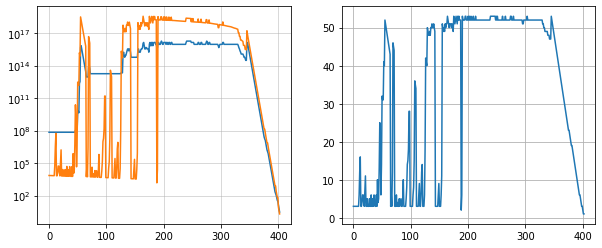

In [219]:

plot_conraction_costs(reduced_parallel_graph, peo_dp)

In [191]:
original_graph = reduced_parallel_graph

In [192]:
original_peo = peo_from_parallel_tree

In [193]:
n=50

Before contracting 50 steps: Nodes, edges: 403 2000
After contracting 50 steps:  Nodes, edges: 353 2155
Total FLOP: 1.226318e+20, maximum mem: 6.755399e+15
Max peo: 52


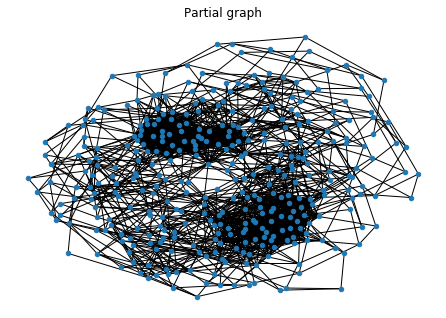

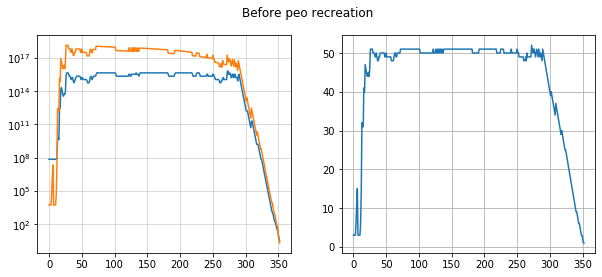

Total FLOP: 1.267820e+20, maximum mem: 6.755399e+15
Max peo: 52


Text(0.5, 0.98, 'After peo recreation')

<Figure size 432x288 with 0 Axes>

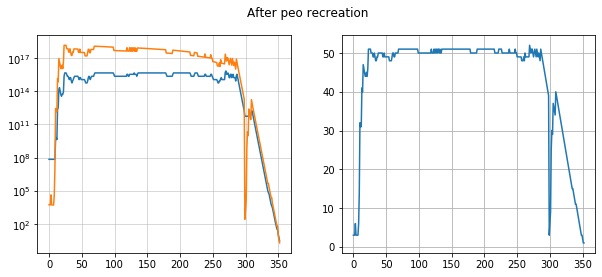

In [194]:
reduced_graph = partial_contract(original_graph, original_peo, n_steps=n, with_plot=True)
plt.title('Partial graph')

peo_d = original_peo[n:]
plot_conraction_costs(reduced_graph, peo_d)
plt.gcf().suptitle('Before peo recreation')
plt.show()
plt.clf()

tree_d = qtree.graph_model.clique_trees.get_tree_from_peo(reduced_graph, peo_d)
peo_tree = qtree.graph_model.clique_trees.get_peo_from_tree(tree_d)
plot_conraction_costs(reduced_graph, peo_tree)
plt.gcf().suptitle('After peo recreation')


In [383]:
partial_graph_par0 = partial_graph.copy()
peo_parral_d = list(peo_d)
for pvar in par_vars:
    qtree.graph_model.base.remove_node(partial_graph_par0, pvar)
    peo_parral_d.remove(pvar)

In [390]:
peo_dp, tw_dp = qtree.graph_model.peo_calculation.get_upper_bound_peo_pace2017(partial_graph_par0, wait_time=60*15)

c read Graph
c width = 580
c time = 922 ms
c width = 79
c time = 3653 ms
c width = 78
c time = 9052 ms
c width = 74
c time = 20430 ms
c width = 73
c time = 30982 ms
c width = 72
c time = 53347 ms
c width = 71
c time = 54634 ms
c width = 70
c time = 64781 ms
c width = 69
c time = 74024 ms
c width = 68
c time = 74997 ms
c width = 67
c time = 81494 ms
c width = 66
c time = 89874 ms
c width = 65
c time = 92257 ms
c width = 64
c time = 125823 ms
c width = 63
c time = 167318 ms
c width = 62
c time = 205283 ms
c width = 61
c time = 238744 ms
c width = 60
c time = 290680 ms
c width = 59
c time = 363281 ms
c width = 58
c time = 417882 ms
c width = 57
c time = 472290 ms
c width = 56
c time = 521709 ms
c width = 55
c time = 606412 ms
c width = 54
c time = 976963 ms
[6900.014s][warning][os,thread] Failed to start thread - pthread_create failed (EAGAIN) for attributes: stacksize: 204800k, guardsize: 0k, detached.



ValueError: File format error at line 49:
 expected pattern: re.compile('^(\\s*s\\s+)(?P<file_type>td)\\s+(?P<n_cliques>\\d+)\\s+(?P<max_clique>\\d+)\\s+(?P<n_nodes>\\d+)')

In [195]:
peo_greedy, path_greedy = qtensor.utils.get_locale_peo(reduced_graph, qtensor.utils.n_neighbors)


Total FLOP: 8.126863e+31, maximum mem: 1.521181e+31
Max peo: 103


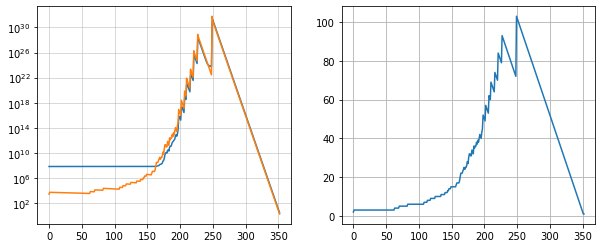

In [196]:
plot_conraction_costs(reduced_graph, peo_greedy)

In [388]:
tw_dp

54

Total FLOP: 9.935076e+20, maximum mem: 3.828060e+16
Max peo: 54


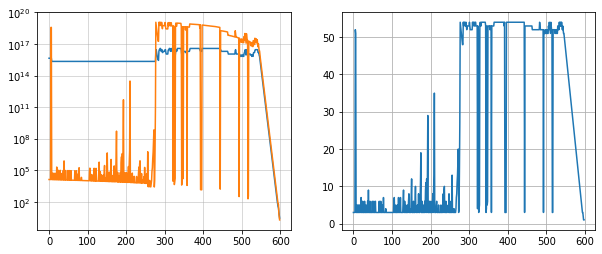

In [389]:
plot_conraction_costs(partial_graph_par0, peo_dp)


## Late parallelization

Nodes, edges: 604 2236


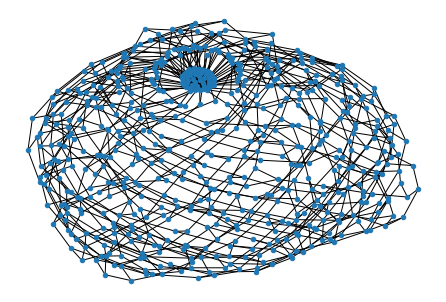

In [366]:
partial_graph = reduced_graph.copy()
partial_step = 150

for n in list(opt_line_strip.nodes())[:partial_step]:
    qtree.graph_model.eliminate_node(partial_graph, n)

print('Nodes, edges:', partial_graph.number_of_nodes(), partial_graph.number_of_edges())
nx.draw_kamada_kawai(partial_graph, node_size=20)

In [367]:
len(nx_approx.max_clique(partial_graph))

53

In [171]:
### Run late optimization algo

In [196]:
partial_ints_graph = nx.convert_node_labels_to_integers(partial_graph, first_label=1)
file = qtree.graph_model.peo_calculation.generate_gr_file(partial_ints_graph, '../../partial_300.gv')


In [ ]:
peo_late, tw_late = qtree.graph_model.peo_calculation.get_upper_bound_peo_pace2017(partial_graph, wait_time=60*35)

In [181]:

tw_late

53

In [183]:
print(peo_late)
print(peo[partial_step:])

[906, 731, 1058, 646, 623, 627, 781, 386, 338, 339, 548, 546, 738, 691, 698, 695, 700, 542, 537, 539, 541, 540, 381, 569, 710, 380, 379, 382, 410, 761, 409, 411, 378, 657, 693, 711, 398, 756, 399, 749, 799, 435, 854, 434, 841, 433, 801, 431, 426, 798, 428, 429, 794, 759, 692, 588, 578, 579, 576, 585, 586, 697, 354, 727, 589, 701, 340, 323, 490, 489, 491, 482, 484, 483, 485, 897, 903, 893, 894, 762, 405, 407, 764, 406, 408, 755, 763, 867, 855, 460, 835, 833, 447, 840, 449, 450, 325, 446, 871, 864, 598, 328, 858, 451, 839, 312, 992, 313, 912, 240, 461, 1103, 1065, 913, 865, 869, 462, 377, 752, 612, 744, 834, 401, 765, 795, 402, 400, 403, 353, 591, 728, 368, 367, 753, 363, 355, 370, 362, 366, 838, 790, 892, 859, 760, 832, 792, 791, 754, 329, 606, 844, 849, 850, 991, 846, 414, 842, 852, 454, 843, 455, 611, 603, 607, 614, 616, 605, 615, 609, 452, 788, 748, 453, 590, 837, 677, 740, 675, 397, 747, 773, 383, 610, 600, 388, 714, 604, 613, 595, 596, 593, 709, 597, 617, 566, 562, 565, 567, 706, 7

Total FLOP: 1.526529e+20, maximum mem: 2.702160e+16


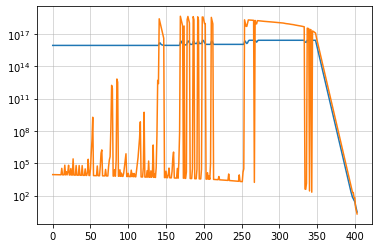

In [190]:
mems, flops = plot_costs_peo(partial_graph, peo_late)
print(f'Total FLOP: {sum(flops):e}, maximum mem: {max(mems):e}')

### Get tree

In [51]:
import matplotlib.cm as cmap
def tree_from_graph(graph, peo, with_plot=False):
    tree = qtree.graph_model.clique_trees.get_tree_from_peo(graph, peo)

    if with_plot:
        cm = cmap.get_cmap('gnuplot2')
        sizes = [len(n) for n in tree.nodes()]
        colors = [cm(size/57) for size in sizes]

        nx.draw_kamada_kawai(tree, node_color=colors, node_size=20)
        plt.show()
    return tree

In [52]:
tree = tree_from_graph(partial_graph, peo_late, with_plot=True)


NameError: name 'partial_graph' is not defined

In [256]:
import matplotlib.cm as cmap

cm = cmap.get_cmap('gnuplot2')
sizes = [len(n) for n in tree.nodes()]
colors = [cm(size/57) for size in sizes]


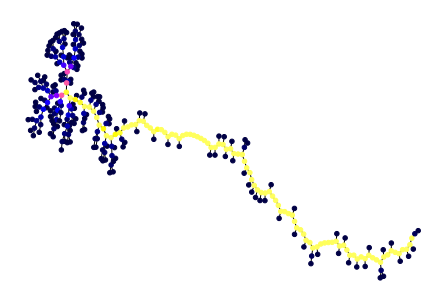

In [206]:
from libvis.modules import graph
from libvis import Vis


vis = Vis()

Started libvis app at http://localhost:7000


In [208]:
vis.vars.tree = graph(graph=nx.convert_node_labels_to_integers(tree))
vis.show()

127.0.0.1 - - [17/Jul/2020 23:12:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2020 23:12:42] "GET /index.bundle.js?362eed064144dcf72a9a HTTP/1.1" 200 -
2020-07-17 23:12:43.534 | ERROR    | legimens.App:_handle_obj_ref:111 - No child with ref undefined
127.0.0.1 - - [17/Jul/2020 23:12:45] "GET /favicon.ico HTTP/1.1" 200 -


In [225]:
opt = qopt.Optimizer.TreeTrimSplitter()
par_vars = opt._get_par_vars(partial_graph, peo_late, 2)

In [226]:
par_vars

[805, 253]

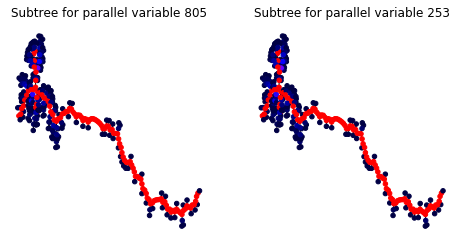

In [239]:
f, axs = plt.subplots(1, len(par_vars), figsize=(len(par_vars)*4, 4))
axs = iter(axs)

for pvar in par_vars:
    colors = [(1,0,0,1) if (pvar in n) else c for c, n in zip(colors, tree.nodes())]
    ax = next(axs)
    plt.sca(ax)
    nx.draw_kamada_kawai(tree, node_color=colors, node_size=20)
    ax.set_title(f'Subtree for parallel variable {pvar}')

plt.show()

In [242]:
pvar = par_vars[0]
partial_graph_par1 = partial_graph.copy()
partial_graph_par1.remove_node(pvar)
peo_parral_late = list(peo_late)
peo_parral_late.remove(pvar)

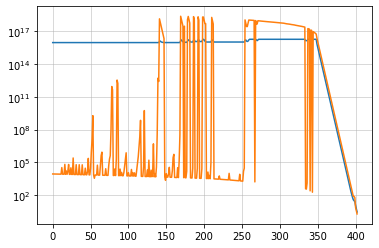

In [244]:
mems, flops = plot_costs_peo(partial_graph_par1, peo_parral_late )

Max peo: 52


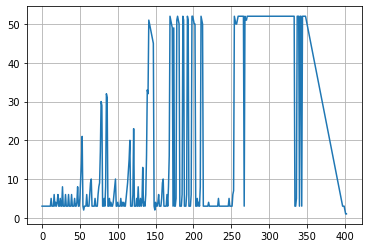

In [248]:
_, path = qtensor.utils.get_neighbours_path(partial_graph_par1, peo_parral_late )
plt.plot(path)
plt.grid()
print(f'Max peo: {max(path)}')

In [259]:
tree_par = qtree.graph_model.clique_trees.rm_element_in_tree(tree, pvar)

peo_from_tree = qtree.graph_model.clique_trees.get_peo_from_tree(tree_par)
print(peo_from_tree)
print(peo_parral_late)

[731, 1058, 646, 623, 627, 781, 386, 338, 339, 548, 546, 738, 691, 698, 695, 700, 542, 537, 539, 541, 540, 381, 569, 710, 380, 379, 382, 410, 761, 409, 411, 378, 657, 693, 711, 398, 756, 399, 749, 799, 435, 854, 434, 841, 433, 801, 431, 426, 798, 428, 429, 794, 759, 692, 578, 579, 576, 585, 586, 697, 354, 727, 340, 323, 490, 489, 491, 482, 484, 483, 485, 897, 903, 405, 407, 764, 406, 408, 867, 855, 460, 835, 833, 447, 840, 449, 450, 325, 446, 871, 864, 598, 328, 858, 451, 839, 312, 992, 313, 912, 240, 461, 1103, 1065, 913, 865, 869, 462, 377, 752, 612, 744, 834, 401, 765, 795, 402, 400, 403, 353, 591, 728, 368, 367, 753, 363, 355, 370, 362, 366, 838, 790, 329, 849, 850, 991, 846, 414, 842, 852, 454, 843, 611, 603, 607, 614, 616, 605, 615, 590, 677, 740, 675, 610, 600, 388, 714, 595, 596, 593, 709, 566, 562, 565, 567, 557, 696, 707, 558, 559, 556, 560, 387, 690, 866, 463, 394, 625, 804, 602, 684, 638, 665, 371, 1108, 264, 337, 990, 874, 989, 810, 797, 796, 778, 415, 774, 618, 634, 662, 

Total FLOP: 5.448055e+19, maximum mem: 1.801440e+16


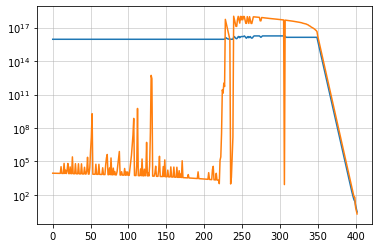

In [262]:
mems, flops = plot_costs_peo(partial_graph_par1, peo_from_tree )
print(f'Total FLOP: {sum(flops):e}, maximum mem: {max(mems):e}')

Max peo: 52


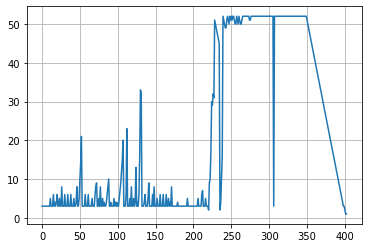

In [260]:
_, path = qtensor.utils.get_neighbours_path(partial_graph_par1, peo_from_tree)
plt.plot(path)
plt.grid()
print(f'Max peo: {max(path)}')

## Secod late par

Nodes, edges: 223 1619


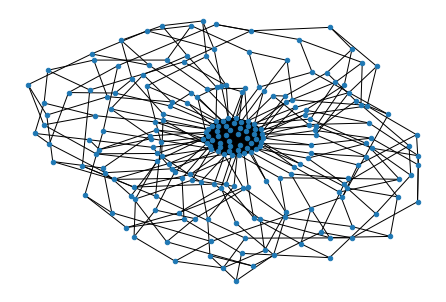

In [265]:
partial_graph2 = partial_graph_par1.copy()
partial_step = 180

for n in list(partial_graph_par1.nodes())[:partial_step]:
    qtree.graph_model.eliminate_node(partial_graph2, n)

print('Nodes, edges:', partial_graph2.number_of_nodes(), partial_graph2.number_of_edges())
nx.draw_kamada_kawai(partial_graph2, node_size=20)

In [331]:
import networkx.algorithms.approximation as nx_approx
len(nx_approx.max_clique(partial_graph2))

52

In [ ]:
partial_ints_graph = nx.convert_node_labels_to_integers(partial_graph2, first_label=1)
file = qtree.graph_model.peo_calculation.generate_gr_file(partial_ints_graph, '../../partial_300_180.gv')

In [272]:
peo_late2, tw_late2 = qtree.graph_model.peo_calculation.get_upper_bound_peo_pace2017(partial_graph2, wait_time=60*5)

In [273]:
tw_late2

52

Total FLOP: 1.409233e+19, maximum mem: 9.007201e+15


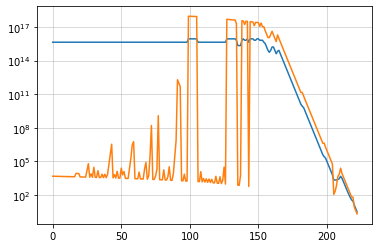

In [276]:
mems, flops = plot_costs_peo(partial_graph2, peo_late2, print_stat=True)

Max peo: 52


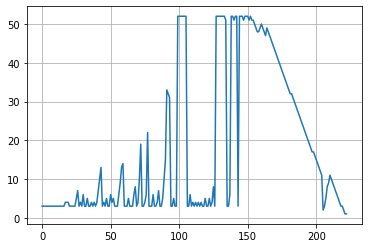

In [275]:
_, path = qtensor.utils.get_neighbours_path(partial_graph2, peo_late2)
plt.plot(path)
plt.grid()
print(f'Max peo: {max(path)}')

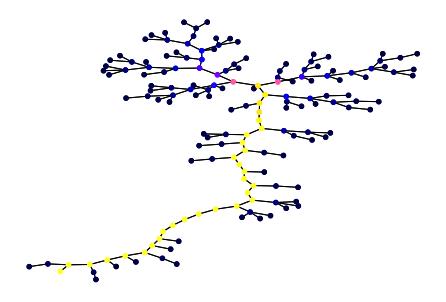

In [279]:
import matplotlib.cm as cmap
tree2 = qtree.graph_model.clique_trees.get_tree_from_peo(partial_graph2, peo_late2)

cm = cmap.get_cmap('gnuplot2')
sizes = [len(n) for n in tree2.nodes()]
colors = [cm(size/57) for size in sizes]

nx.draw_kamada_kawai(tree2, node_color=colors, node_size=20)
plt.show()

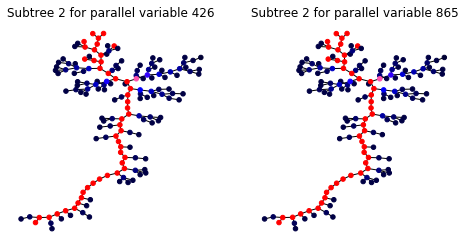

In [283]:
par_vars = opt._get_par_vars(partial_graph2, peo_late2, 2)

f, axs = plt.subplots(1, len(par_vars), figsize=(len(par_vars)*4, 4))
axs = iter(axs)

for pvar in par_vars:
    colors = [(1,0,0,1) if (pvar in n) else c for c, n in zip(colors, tree2.nodes())]
    ax = next(axs)
    plt.sca(ax)
    nx.draw_kamada_kawai(tree2, node_color=colors, node_size=20)
    ax.set_title(f'Subtree 2 for parallel variable {pvar}')

plt.show()

In [295]:
pvar = par_vars[0]
print('Removing node', pvar)
partial2_graph_par1 = partial_graph2.copy()
qtree.graph_model.splitters.remove_node(partial2_graph_par1, pvar)
peo_parral_late2 = list(peo_late2)
peo_parral_late2.remove(pvar)

Removing node 426


Total FLOP: 7.046165e+18, maximum mem: 4.503601e+15


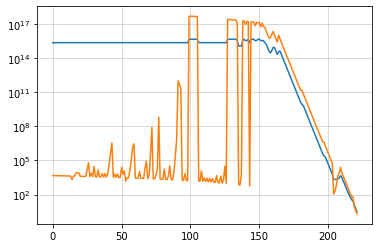

In [296]:
mems, flops = plot_costs_peo(partial2_graph_par1, peo_parral_late2, print_stat=True)

Max peo: 51


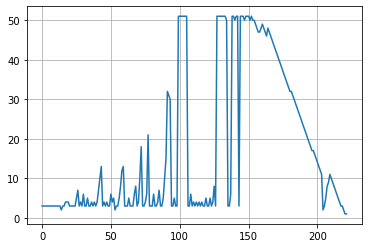

In [299]:
_, path = qtensor.utils.get_neighbours_path(partial2_graph_par1, peo_parral_late2 )
plt.plot(path)
plt.grid()
print(f'Max peo: {max(path)}')

In [300]:
tree_par2 = qtree.graph_model.clique_trees.rm_element_in_tree(tree2, pvar)

peo_from_tree2 = qtree.graph_model.clique_trees.get_peo_from_tree(tree_par2)

Total FLOP: 2.850238e+18, maximum mem: 6.755399e+15


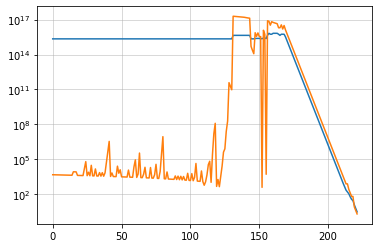

In [302]:
mems, flops = plot_costs_peo(partial2_graph_par1, peo_from_tree2, print_stat=True)

Max peo: 51


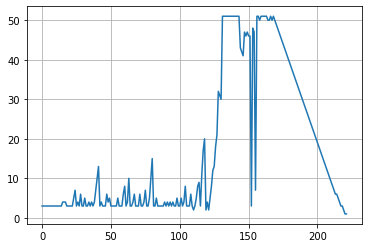

In [303]:
_, path = qtensor.utils.get_neighbours_path(partial2_graph_par1, peo_from_tree2 )
plt.plot(path)
plt.grid()
print(f'Max peo: {max(path)}')

## Third late par

### Contract several nodes

Nodes, edges: 169 1532


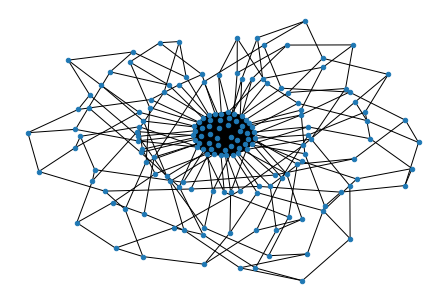

In [305]:
partial_graph3 = partial_contract(partial2_graph_par1, 80, with_plot=True)

In [330]:
len(nx_approx.max_clique(partial_graph3))

52

In [ ]:
partial_ints_graph = nx.convert_node_labels_to_integers(partial_graph2, first_label=1)
file = qtree.graph_model.peo_calculation.generate_gr_file(partial_ints_graph, '../../partial_300_180.gv')

### Recompute peo

In [306]:
peo_late3, tw_late3 = qtree.graph_model.peo_calculation.get_upper_bound_peo_pace2017(partial_graph3, wait_time=60*5)

In [308]:
tw_late3

52

Total FLOP: 1.902208e+18, maximum mem: 9.007199e+15
Max peo: 52


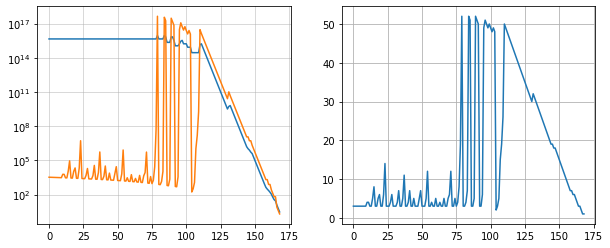

In [314]:
plot_conraction_costs(partial_graph3, peo_late3)

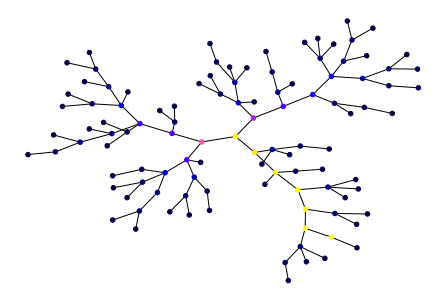

In [316]:

tree3 = tree_from_graph(partial_graph3, peo_late3, with_plot=True)

### find slice variables with tree trimming

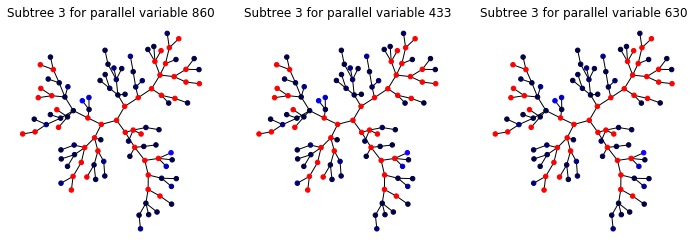

In [319]:
par_vars = opt._get_par_vars(partial_graph3, peo_late3, 3)

f, axs = plt.subplots(1, len(par_vars), figsize=(len(par_vars)*4, 4))
axs = iter(axs)

for pvar in par_vars:
    colors = [(1,0,0,1) if (pvar in n) else c for c, n in zip(colors, tree3.nodes())]
    ax = next(axs)
    plt.sca(ax)
    nx.draw_kamada_kawai(tree3, node_color=colors, node_size=20)
    ax.set_title(f'Subtree 3 for parallel variable {pvar}')

plt.show()

In [320]:
pvar = par_vars[0]
print('Removing node', pvar)
partial3_graph_par1 = partial_graph3.copy()
qtree.graph_model.splitters.remove_node(partial3_graph_par1, pvar)
peo_parral_late3 = list(peo_late3)
peo_parral_late3.remove(pvar)

Removing node 860


Total FLOP: 9.511041e+17, maximum mem: 4.503600e+15
Max peo: 51


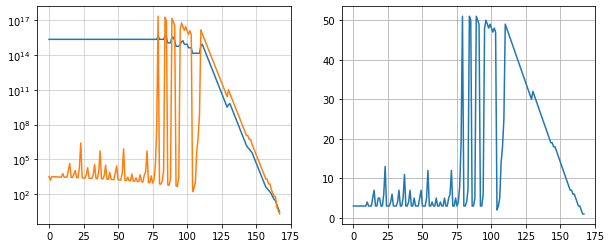

In [323]:
plot_conraction_costs(partial3_graph_par1, peo_parral_late3j)

### Remove par variable and  get peo from parallel tree

In [325]:
tree_par3 = qtree.graph_model.clique_trees.rm_element_in_tree(tree3, pvar)

peo_from_tree3 = qtree.graph_model.clique_trees.get_peo_from_tree(tree_par3)

Total FLOP: 4.568343e+17, maximum mem: 4.503601e+15
Max peo: 51


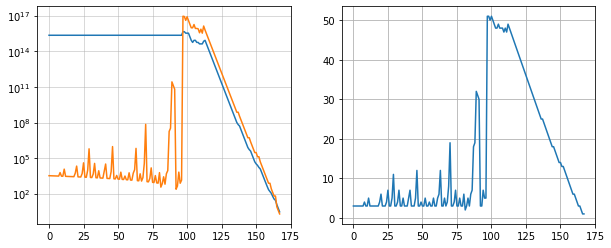

In [327]:
plot_conraction_costs(partial3_graph_par1, peo_from_tree3)

Max peo: 51


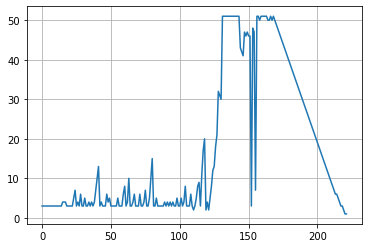

In [303]:
_, path = qtensor.utils.get_neighbours_path(partial2_graph_par1, peo_from_tree2 )
plt.plot(path)
plt.grid()
print(f'Max peo: {max(path)}')

Nodes, edges: 223 1619


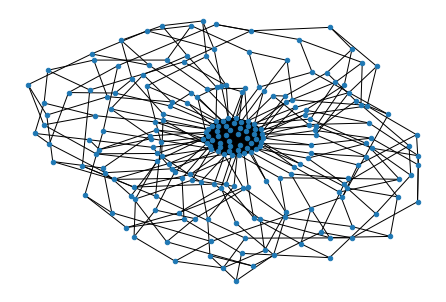

In [265]:
partial_graph2 = partial_graph_par1.copy()
partial_step = 180

for n in list(partial_graph_par1.nodes())[:partial_step]:
    qtree.graph_model.eliminate_node(partial_graph2, n)

print('Nodes, edges:', partial_graph2.number_of_nodes(), partial_graph2.number_of_edges())
nx.draw_kamada_kawai(partial_graph2, node_size=20)

In [ ]:
partial_ints_graph = nx.convert_node_labels_to_integers(partial_graph2, first_label=1)
file = qtree.graph_model.peo_calculation.generate_gr_file(partial_ints_graph, '../../partial_300_180.gv')

In [272]:
peo_late2, tw_late2 = qtree.graph_model.peo_calculation.get_upper_bound_peo_pace2017(partial_graph2, wait_time=60*5)

In [273]:
tw_late2

52

Total FLOP: 1.409233e+19, maximum mem: 9.007201e+15


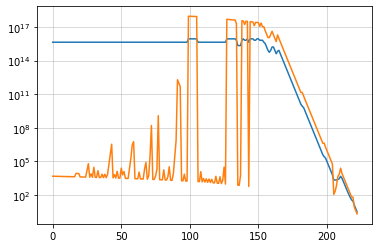

In [276]:
mems, flops = plot_costs_peo(partial_graph2, peo_late2, print_stat=True)

Max peo: 52


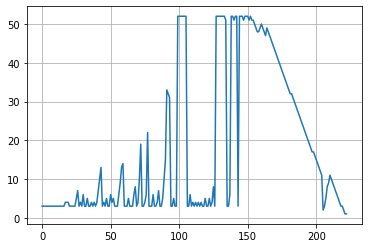

In [275]:
_, path = qtensor.utils.get_neighbours_path(partial_graph2, peo_late2)
plt.plot(path)
plt.grid()
print(f'Max peo: {max(path)}')

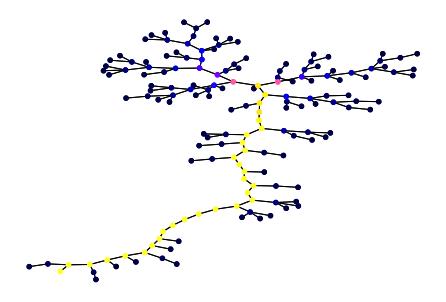

In [279]:
import matplotlib.cm as cmap
tree2 = qtree.graph_model.clique_trees.get_tree_from_peo(partial_graph2, peo_late2)

cm = cmap.get_cmap('gnuplot2')
sizes = [len(n) for n in tree2.nodes()]
colors = [cm(size/57) for size in sizes]

nx.draw_kamada_kawai(tree2, node_color=colors, node_size=20)
plt.show()

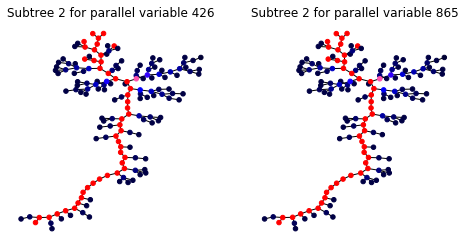

In [283]:
par_vars = opt._get_par_vars(partial_graph2, peo_late2, 2)

f, axs = plt.subplots(1, len(par_vars), figsize=(len(par_vars)*4, 4))
axs = iter(axs)

for pvar in par_vars:
    colors = [(1,0,0,1) if (pvar in n) else c for c, n in zip(colors, tree2.nodes())]
    ax = next(axs)
    plt.sca(ax)
    nx.draw_kamada_kawai(tree2, node_color=colors, node_size=20)
    ax.set_title(f'Subtree 2 for parallel variable {pvar}')

plt.show()

In [295]:
pvar = par_vars[0]
print('Removing node', pvar)
partial2_graph_par1 = partial_graph2.copy()
qtree.graph_model.splitters.remove_node(partial2_graph_par1, pvar)
peo_parral_late2 = list(peo_late2)
peo_parral_late2.remove(pvar)

Removing node 426


Total FLOP: 7.046165e+18, maximum mem: 4.503601e+15


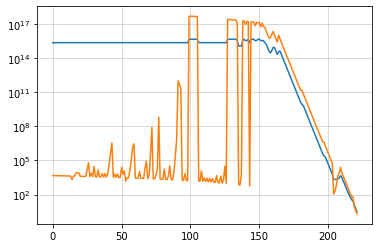

In [296]:
mems, flops = plot_costs_peo(partial2_graph_par1, peo_parral_late2, print_stat=True)

Max peo: 51


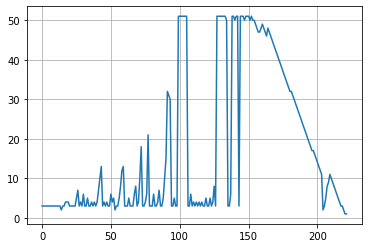

In [299]:
_, path = qtensor.utils.get_neighbours_path(partial2_graph_par1, peo_parral_late2 )
plt.plot(path)
plt.grid()
print(f'Max peo: {max(path)}')

In [300]:
tree_par2 = qtree.graph_model.clique_trees.rm_element_in_tree(tree2, pvar)

peo_from_tree2 = qtree.graph_model.clique_trees.get_peo_from_tree(tree_par2)

Total FLOP: 2.850238e+18, maximum mem: 6.755399e+15


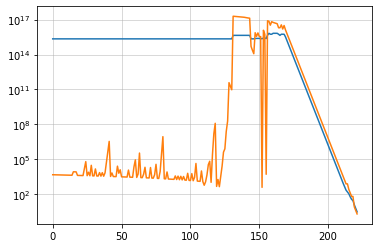

In [302]:
mems, flops = plot_costs_peo(partial2_graph_par1, peo_from_tree2, print_stat=True)

Max peo: 51


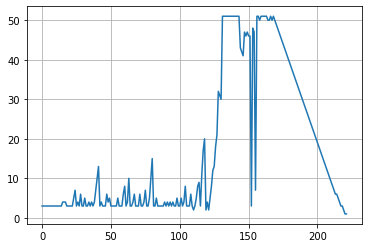

In [303]:
_, path = qtensor.utils.get_neighbours_path(partial2_graph_par1, peo_from_tree2 )
plt.plot(path)
plt.grid()
print(f'Max peo: {max(path)}')